In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import paths
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage.transform import resize
from skimage import exposure
from scipy.spatial import distance


In [2]:
image1 = cv2.imread('Objects/brain/image_0014.jpg')

In [3]:
image2 = cv2.imread('Objects/brain/image_0013.jpg')

In [4]:
image3 = cv2.imread('Objects/brain/image_0015.jpg')

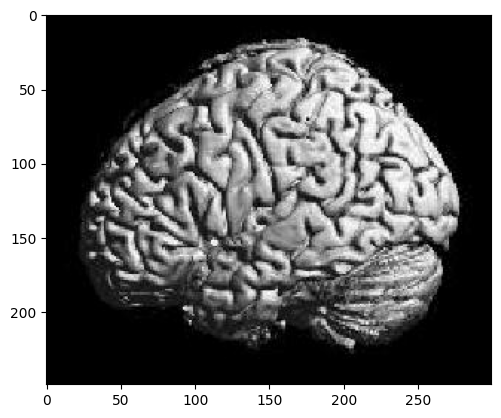

In [5]:
plt.imshow(image1)

In [6]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

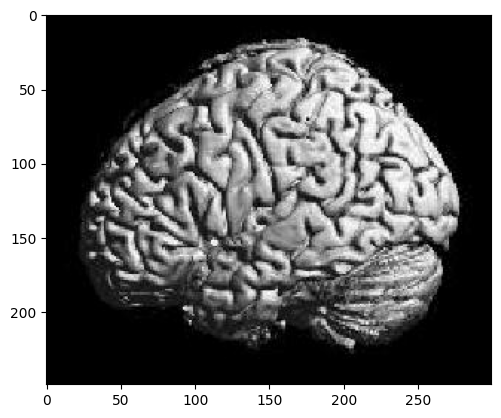

In [7]:
plt.imshow(image1)

In [8]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [9]:
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

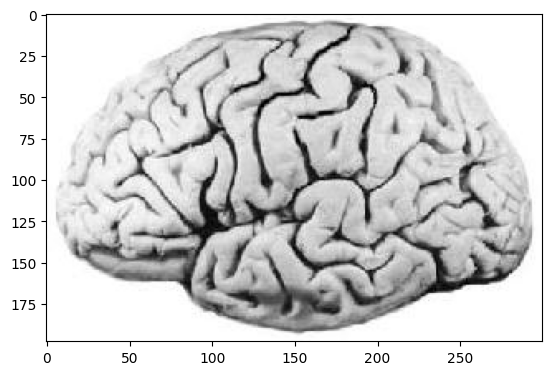

In [10]:
plt.imshow(image2)

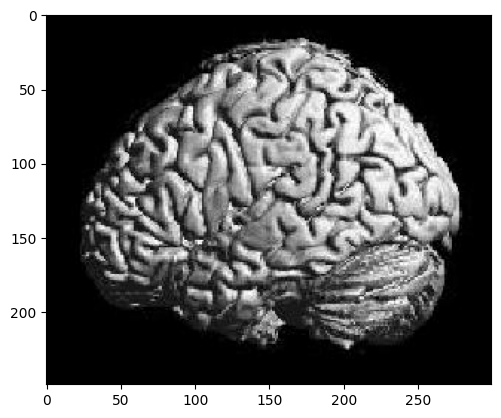

In [11]:
plt.imshow(image3)

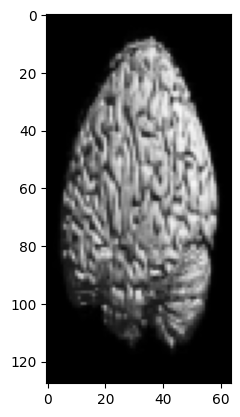

In [12]:
resized_img1 = resize(image1, (128,64)) 
plt.imshow(resized_img1)
resized_img2 = resize(image2, (128,64)) 
resized_img3 = resize(image3, (128,64)) 

In [16]:
from skimage.feature import hog

fd1, hog_image1 = hog(resized_img1,
                      channel_axis=-1,  # color image
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True)

fd2, hog_image2 = hog(resized_img2,
                      channel_axis=-1,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True)

fd3, hog_image3 = hog(resized_img3,
                      channel_axis=-1,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True)

histfd1 = cv2.normalize(fd1, fd1)
histfd1_f=histfd1.flatten()
histfd2 = cv2.normalize(fd2, fd2)
histfd2_f=histfd2.flatten()
histfd3 = cv2.normalize(fd3, fd3)
histfd3_f=histfd3.flatten()
histfd1_f

array([0., 0., 0., ..., 0., 0., 0.])

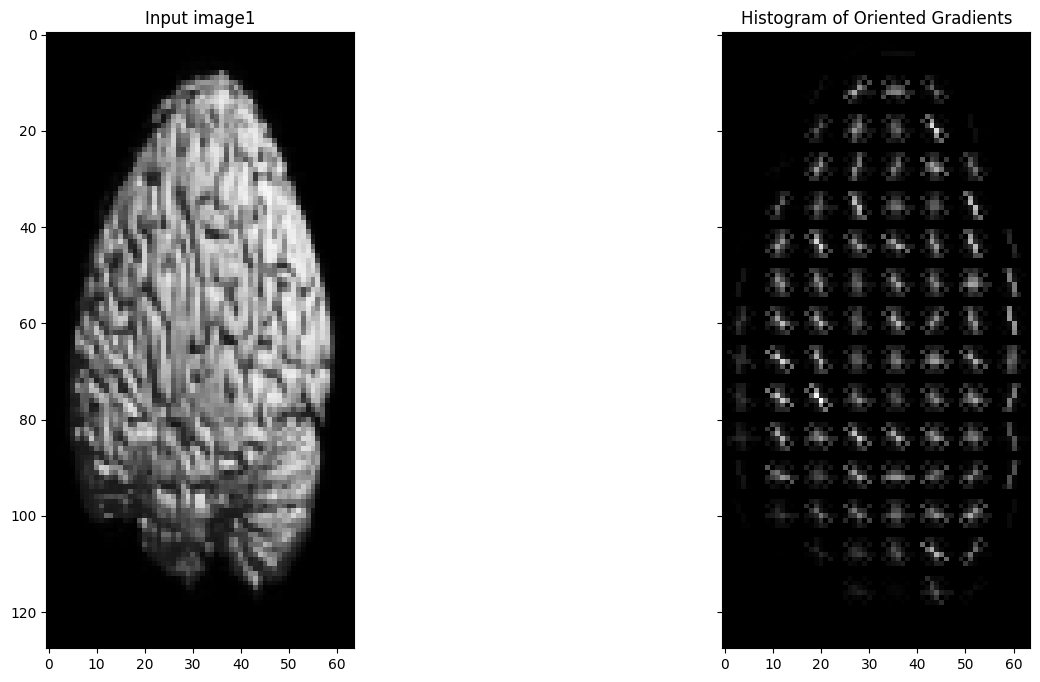

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img1, cmap=plt.cm.gray) 
ax1.set_title('Input image1') 

# Rescale histogram for better display 
hog_image1_rescaled = exposure.rescale_intensity(hog_image1, in_range=(0, 10)) 

ax2.imshow(hog_image1_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [18]:
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
	# return the chi-squared distance
	return d

In [19]:
d = chi2_distance(histfd1_f, histfd2_f)
d

np.float64(9.663562745011935)

In [20]:
d = chi2_distance(histfd2_f, histfd3_f)
d

np.float64(10.18531020222242)

In [21]:
d = chi2_distance(histfd1_f, histfd3_f)
d

np.float64(3.6341981133540755)

In [22]:
imagePaths = list(paths.list_images('Objects/brain/'))

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols=1, titles=None):
    n_images = len(images)
    if titles is None:
        titles = [''] * n_images

    fig = plt.figure(figsize=(15, 8))

    n_rows = int(np.ceil(n_images / float(cols)))

    for n, (image, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(n_rows, cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        ax.imshow(image)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [31]:
i=0
dlist=[]
for (i, imagePath) in enumerate(imagePaths):
    # load the input image
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    imagedb = cv2.imread(imagePath)
    imagedb = cv2.cvtColor(imagedb, cv2.COLOR_BGR2RGB)
    resized_imgdb = resize(imagedb, (128,64)) 
    fddb, hog_imagedb = hog(resized_imgdb, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,channel_axis=-1)
    histfddb = cv2.normalize(fddb, fd1)
    histfddb_f=histfddb.flatten()
    #d=chi2_distance(histfddb_f, histfd1_f)
    d = distance.euclidean(histfddb_f,histfd1_f)
    dlist.append((d,imagePath))
    

[INFO] processing image 1/98
[INFO] processing image 2/98
[INFO] processing image 3/98
[INFO] processing image 4/98
[INFO] processing image 5/98
[INFO] processing image 6/98
[INFO] processing image 7/98
[INFO] processing image 8/98
[INFO] processing image 9/98
[INFO] processing image 10/98
[INFO] processing image 11/98
[INFO] processing image 12/98
[INFO] processing image 13/98
[INFO] processing image 14/98
[INFO] processing image 15/98
[INFO] processing image 16/98
[INFO] processing image 17/98
[INFO] processing image 18/98
[INFO] processing image 19/98
[INFO] processing image 20/98
[INFO] processing image 21/98
[INFO] processing image 22/98
[INFO] processing image 23/98
[INFO] processing image 24/98
[INFO] processing image 25/98
[INFO] processing image 26/98
[INFO] processing image 27/98
[INFO] processing image 28/98
[INFO] processing image 29/98
[INFO] processing image 30/98
[INFO] processing image 31/98
[INFO] processing image 32/98
[INFO] processing image 33/98
[INFO] processing i

In [32]:
dlist.sort(key=lambda x: x[0])

In [33]:
dresult=[]
for i in range(0,8):
    dresult.append(dlist[i][0])

In [34]:
imresult=[]
for i in range(0,8):
    image = cv2.imread(dlist[i][1])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imresult.append(image)

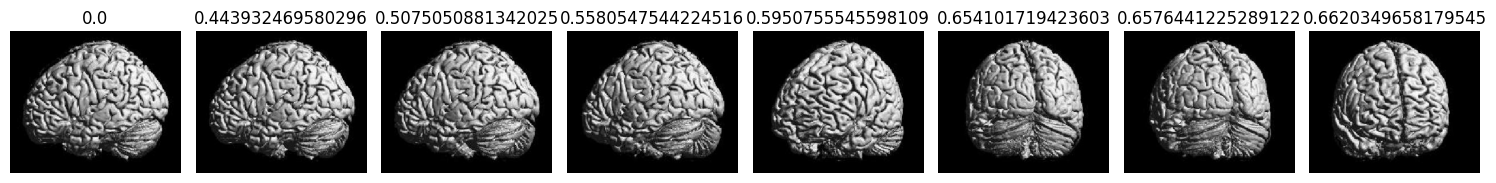

In [35]:
show_images(imresult,8,dresult)